In [1]:
from sklearn.svm import SVC 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr,pointbiserialr,iqr
from sklearn.preprocessing  import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report,root_mean_squared_error, r2_score
import numpy as np
from imblearn.combine import SMOTEENN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import shap

c:\Users\aleen\OneDrive\Desktop\DM_learn\DM_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def check_correlation(df_sample):
    df=df_sample.copy()
    corr_list=[]
    features=list(df.columns)
    features_2=list(df.columns)
    target=features_2[0]
    label_encoder=LabelEncoder()
    df[target]=label_encoder.fit_transform(df[target])
    #print(features_2)
    for feature in features:
        features_2.remove(feature)
        for other_features in features_2:
            if feature==target:
                corr,_=pointbiserialr(df[feature],df[other_features])
                if corr>0.7:
                    print(f"correlation of {feature} with {other_features} is {corr}")
            else:
                corr,_=spearmanr(df[feature],df[other_features])
            corr_list.append({'column_1':feature, 'column_2':other_features,'correlation':corr})
    corr_df=pd.DataFrame(corr_list)
    return corr_df
            

    

In [3]:
def bootstrap_mean(sample_size,feature):
    '''
    there are 10,000 bags
    each bag contains the same number of elements as in feature (sample_size)
    we take mean of each bag
    so we will have 10,000 means
    '''
    mean_of_each_bag=[]
    number_of_bags=10000
    for each_bag in range(0,number_of_bags):
        bag=[]
        for _ in range(0,sample_size):
            bag.append(np.random.choice(feature,replace=True)) #append values 
        mean_of_each_bag.append(np.mean(bag))
        
    return mean_of_each_bag

def bootstrap_median(sample_size,feature):
    '''
    there are 10,000 bags
    each bag contains the same number of elements as in feature (sample_size)
    we take mean of each bag
    so we will have 10,000 means
    '''
    median_of_each_bag=[]
    number_of_bags=10000
    for each_bag in range(0,number_of_bags):
        bag=[]
        for _ in range(0,sample_size):
            bag.append(np.random.choice(feature,replace=True)) #append values 
        median_of_each_bag.append(np.median(bag))
        
    return median_of_each_bag
    
        





In [4]:
data=pd.read_csv('challenge_1_dataset/breast-cancer.csv')
header=pd.read_csv('challenge_1_dataset/field_names.txt',header=None)

In [5]:
data.columns=header[0]

In [6]:
data.head(5)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [7]:
data=data.drop('ID',axis=1)

In [8]:
data.head(3)

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [9]:
data.dtypes

0
diagnosis                      object
radius_mean                   float64
radius_sd_error               float64
radius_worst                  float64
texture_mean                  float64
texture_sd_error              float64
texture_worst                 float64
perimeter_mean                float64
perimeter_sd_error            float64
perimeter_worst               float64
area_mean                     float64
area_sd_error                 float64
area_worst                    float64
smoothness_mean               float64
smoothness_sd_error           float64
smoothness_worst              float64
compactness_mean              float64
compactness_sd_error          float64
compactness_worst             float64
concavity_mean                float64
concavity_sd_error            float64
concavity_worst               float64
concave_points_mean           float64
concave_points_sd_error       float64
concave_points_worst          float64
symmetry_mean                 float64
symmetry_s

In [10]:
check_correlation(data)

correlation of diagnosis with radius_mean is 0.7293761256014488
correlation of diagnosis with radius_worst is 0.7418871602485471
correlation of diagnosis with texture_mean is 0.7083893708468967
correlation of diagnosis with perimeter_sd_error is 0.7763687679290048
correlation of diagnosis with concavity_worst is 0.7757250328692196
correlation of diagnosis with concave_points_sd_error is 0.7824702839920383
correlation of diagnosis with concave_points_worst is 0.732924839634437
correlation of diagnosis with fractal_dimension_mean is 0.7931810769610057


,column_1,column_2,correlation
0,diagnosis,radius_mean,0.729376
1,diagnosis,radius_sd_error,0.422146
2,diagnosis,radius_worst,0.741887
3,diagnosis,texture_mean,0.708389
4,diagnosis,texture_sd_error,0.356276
...,...,...,...
460,symmetry_worst,fractal_dimension_sd_error,0.473583
461,symmetry_worst,fractal_dimension_worst,0.621252
462,fractal_dimension_mean,fractal_dimension_sd_error,0.458005
463,fractal_dimension_mean,fractal_dimension_worst,0.514360


In [11]:
c1=data['diagnosis']=='B'
c2=data['diagnosis']=='M'




In [12]:
b_smoothness_mean=bootstrap_mean(len(data[c1]['smoothness_mean']),data[c1]['smoothness_mean'])

In [13]:
m_smoothness_mean=bootstrap_mean(len(data[c2]['smoothness_mean']),data[c2]['smoothness_mean'])

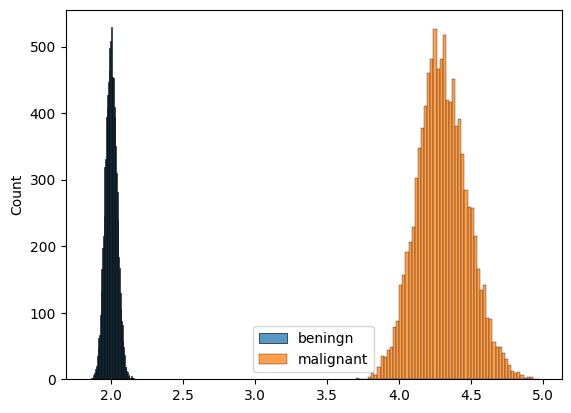

In [14]:
sns.histplot(b_smoothness_mean,label="beningn")
sns.histplot(m_smoothness_mean,label="malignant")
plt.legend()

[]

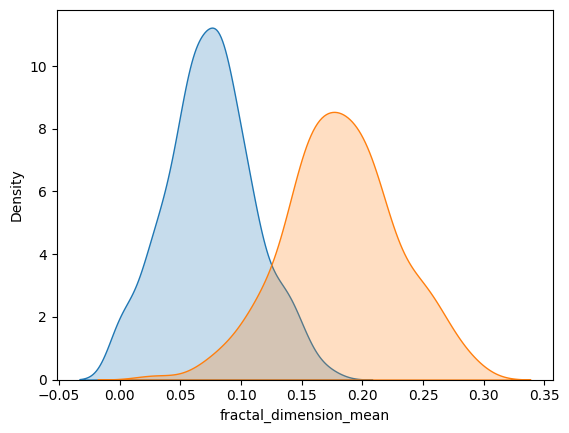

In [15]:
sns.kdeplot(data[c1]['fractal_dimension_mean'],fill=True)
sns.kdeplot(data[c2]['fractal_dimension_mean'],fill=True)
plt.plot()

In [16]:
X=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [17]:
sme=SMOTEENN(random_state=42)
X_res,y_res=sme.fit_resample(X,y)

<Axes: xlabel='count', ylabel='diagnosis'>

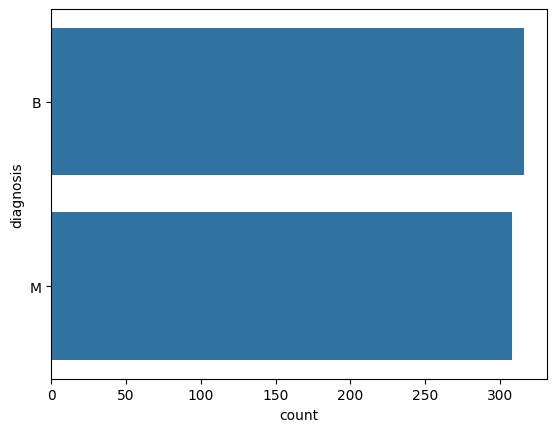

In [18]:
sns.countplot(y_res)

In [19]:
X_train, X_test,y_train,y_test=train_test_split(X_res,y_res,train_size=0.2,random_state=42)


In [20]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [21]:

model_svm=SVC(kernel="rbf",random_state=42)
model_svm.fit(X_train_scaled,y_train)


SVC(random_state=42)

In [22]:
explainer_cls = shap.KernelExplainer(
    model_svm.decision_function,
    shap.kmeans(X_train_scaled, 10)
)

In [23]:

shap_values_cls = explainer_cls.shap_values(X_train_scaled)

100%|██████████| 124/124 [00:24<00:00,  5.07it/s]


In [24]:
shap_values_cls.shape

(124, 30)

In [25]:
shap_values_cls[:, 1]

array([-0.02341992,  0.00414215,  0.02436918,  0.02009825, -0.03514479,
       -0.03501278,  0.02365097, -0.00624417, -0.00989539,  0.01796142,
        0.00885845, -0.02108011, -0.02369024,  0.03256582,  0.03574968,
        0.00958964, -0.02351293,  0.03317006, -0.02782854,  0.        ,
        0.04021587, -0.06119825, -0.01445433, -0.0371536 , -0.02431115,
        0.01729463, -0.02096022, -0.02735842, -0.04003958,  0.00855334,
       -0.07780531,  0.01945226,  0.00310095,  0.00687184,  0.03071276,
       -0.04353653, -0.01175268, -0.00197272,  0.01752592, -0.06260284,
       -0.02133765,  0.00576681, -0.04021381,  0.        , -0.02440444,
        0.03012088, -0.02701599,  0.01224479, -0.02438031, -0.06400271,
        0.06342516, -0.0198324 ,  0.03559988, -0.01305752,  0.00422827,
       -0.01749436, -0.01959558, -0.01199973,  0.01414558, -0.00522679,
        0.02398745, -0.0450601 ,  0.00574194, -0.04873245, -0.01205504,
        0.02611677, -0.02871617, -0.02109343, -0.00977324, -0.00

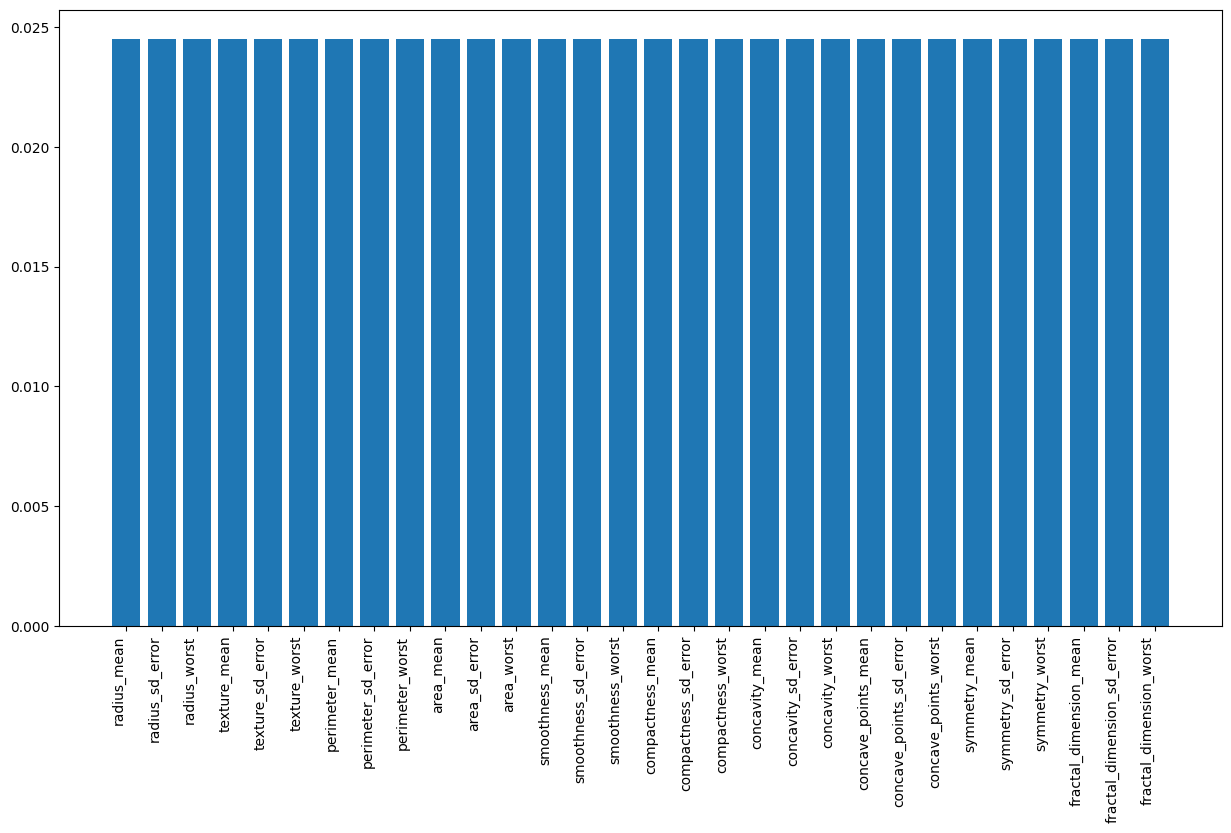

In [26]:

mean_shap_values_cls = np.abs(shap_values_cls[:, 1]).mean(axis=0)
plt.figure(figsize=(15, 8))
plt.bar(X_train.columns, mean_shap_values_cls)
plt.xticks(rotation=90,ha="right")
plt.show()

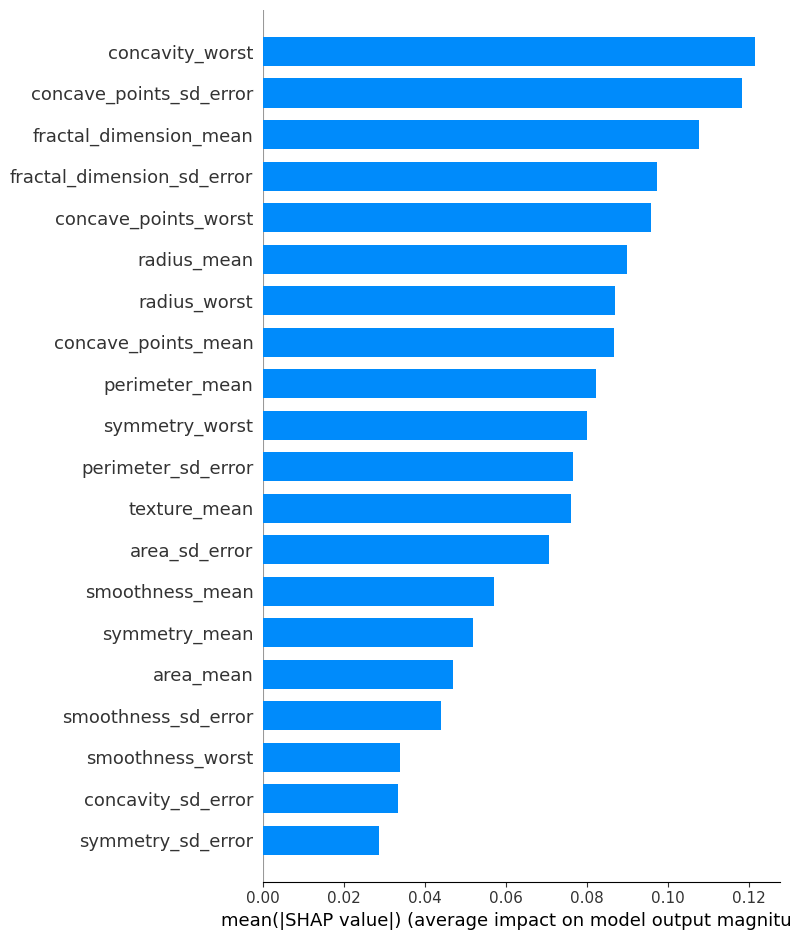

In [30]:
shap.summary_plot(shap_values_cls,X_train,plot_type="bar")